TASK 1: IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,  recall_score, f1_score 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Darshit\OneDrive\Desktop\OIBSIP\Task 1\Iris.csv')

In [3]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').T)
    
data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 900

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 150 rows and 6 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--------------------------------------------------   The last 5 rows of data 

In [4]:
class_counts = df['Species'].value_counts()
print("Class counts of", class_counts)

Class counts of Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [5]:
df['Species']=df['Species'].str.replace('Iris-','')
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values/len(df))*100
check_null = pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})
print(check_null)

if missing_values.any():
    print("Dataset has null values.")
    print("Columns with null values:")
    print(missing_values[missing_values > 0])
else:
    print("\nDataset has no null values.")

               missing_values  percentage_missing
SepalLengthCm               0                 0.0
SepalWidthCm                0                 0.0
PetalLengthCm               0                 0.0
PetalWidthCm                0                 0.0
Species                     0                 0.0

Dataset has no null values.


In [8]:
duplicates = df.duplicated().sum()
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:", duplicates)
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

Duplicates found in the dataset: 3
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm    Species
34             4.9           3.1            1.5           0.1     setosa
37             4.9           3.1            1.5           0.1     setosa
142            5.8           2.7            5.1           1.9  virginica


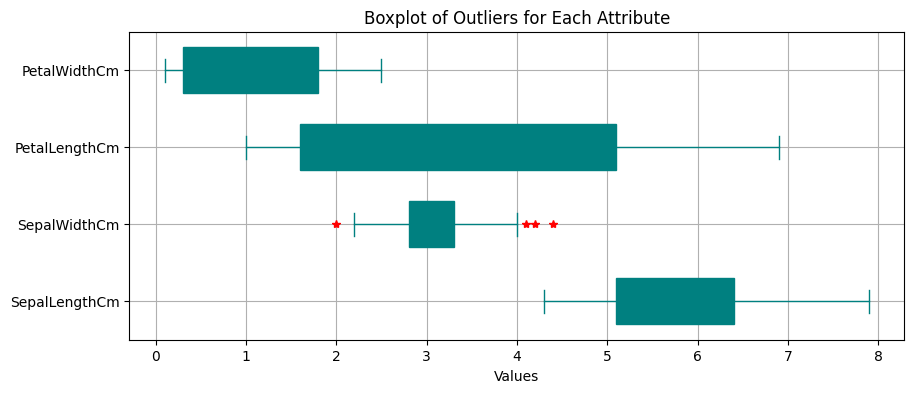

In [9]:
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot of Outliers for Each Attribute')
plt.xlabel('Values')
plt.show()

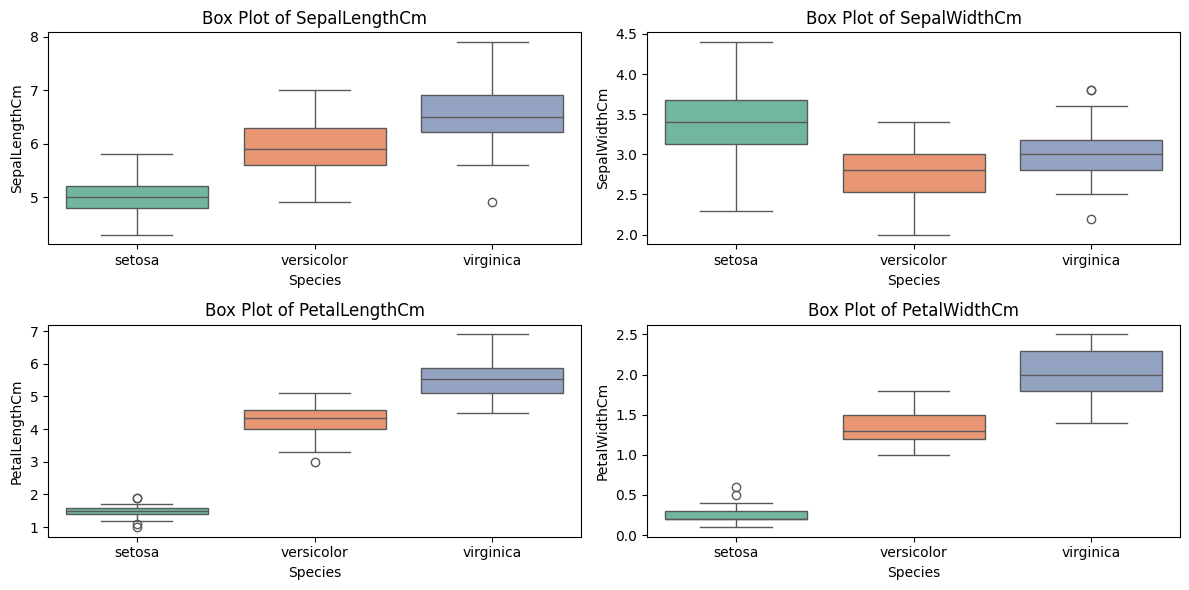

In [10]:
plt.figure(figsize=(12, 6))

attributes = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=attribute, data=df, palette='Set2')

    plt.title(f'Box Plot of {attribute}')
    plt.xlabel('Species')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

In [11]:
input_attributes = df.columns[:-1].tolist()
def replace_outliers_with_median(attribute):
    median = attribute.median()
    lower_limit = attribute.quantile(0.25) - 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    upper_limit = attribute.quantile(0.75) + 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    
    attribute = attribute.apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return attribute

for attribute in input_attributes:
    df[attribute] = replace_outliers_with_median(df[attribute])

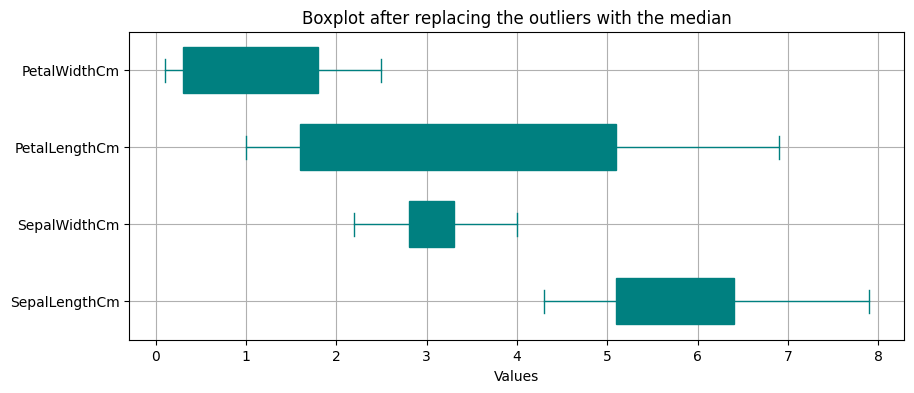

In [12]:
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot after replacing the outliers with the median')
plt.xlabel('Values')
plt.show()

In [13]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Object columns in the dataframe: ['Species']


In [14]:
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in SepalLengthCm column are: 35
No. of unique values in SepalWidthCm column are: 19
No. of unique values in PetalLengthCm column are: 43
No. of unique values in PetalWidthCm column are: 22
No. of unique values in Species column are: 3


In [15]:
unique_val=[]
print("Unique values in each column are - ")
print()
for col in df.columns:
    print(f'{col}: {df[col].unique()}')
    unique_val.append(col)
    print("-"*110)

Unique values in each column are - 

SepalLengthCm: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
--------------------------------------------------------------------------------------------------------------
SepalWidthCm: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  3.8 3.3 2.3 2.8 2.4 2.7 2.2 2.5
 2.6]
--------------------------------------------------------------------------------------------------------------
PetalLengthCm: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
--------------------------------------------------------------------------------------------------------------
PetalWidthCm: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
-----------------------------------------------------------------------------------

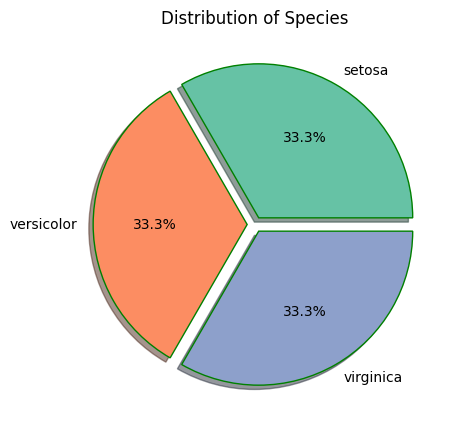

In [16]:
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(df['Species'].value_counts(),
        labels= df['Species'].unique(),
        autopct='%1.1f%%', shadow=True,
        explode=(.05, .05, .05), wedgeprops=wp,
        colors = ['#66c2a5', '#fc8d62', '#8da0cb'], textprops=dict(color="black"))

ax.set_title("Distribution of Species")

plt.show()

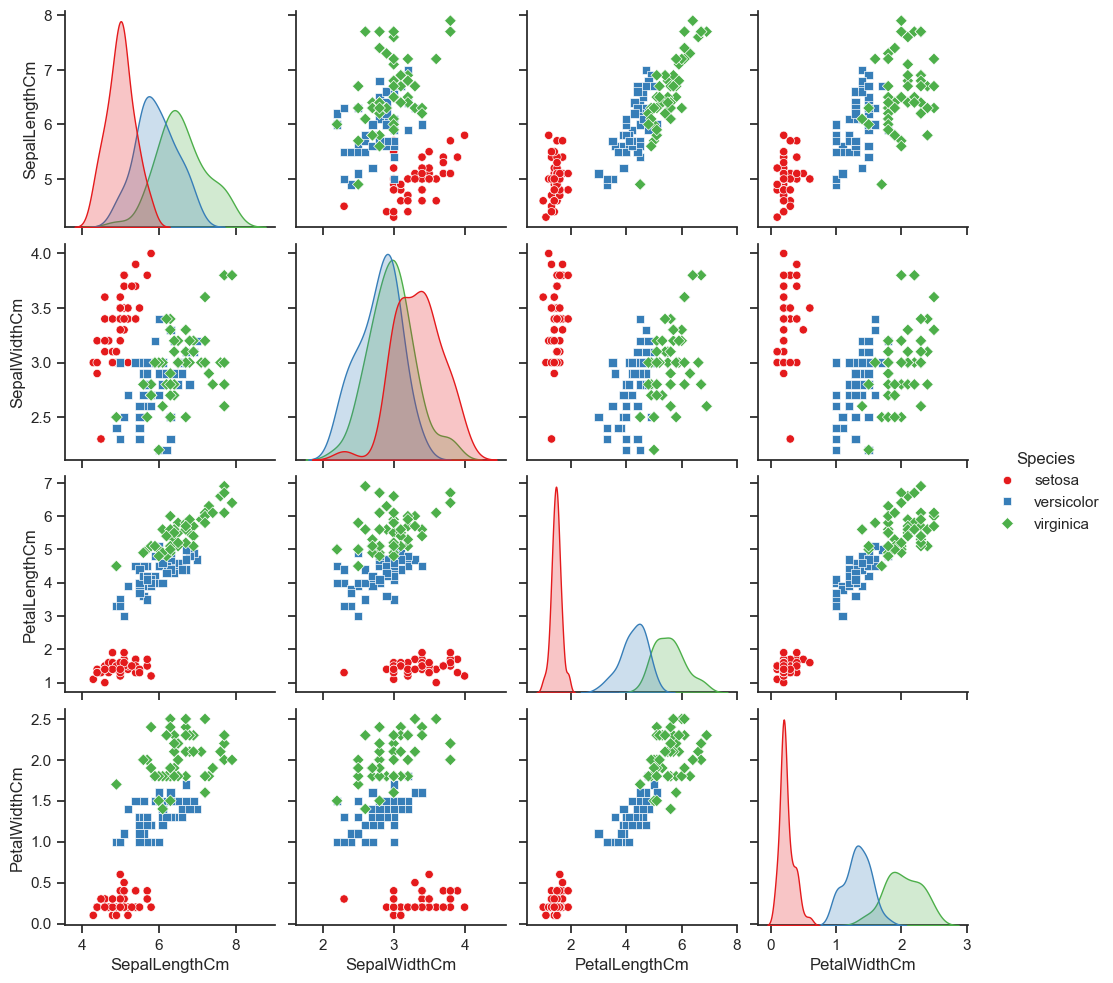

In [17]:
sns.set(style="ticks")
custom_palette = sns.color_palette("Set1")[:3]
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'], palette=custom_palette)
plt.show()

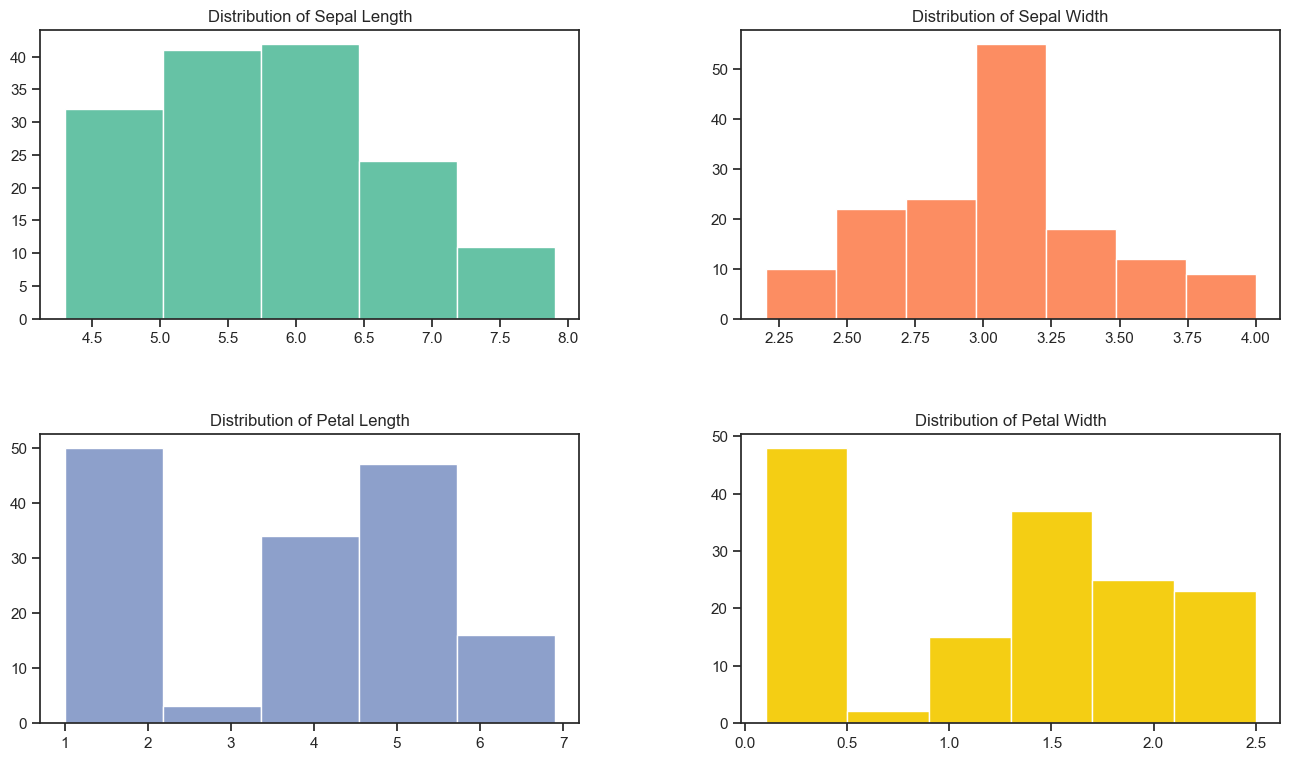

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=5, color="#66c2a5");
axes[0,1].set_title("Distribution of Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=7,color="#fc8d62");
axes[1,0].set_title("Distribution of Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=5,color="#8da0cb");
axes[1,1].set_title("Distribution of Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6,color="#F4CE14");

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

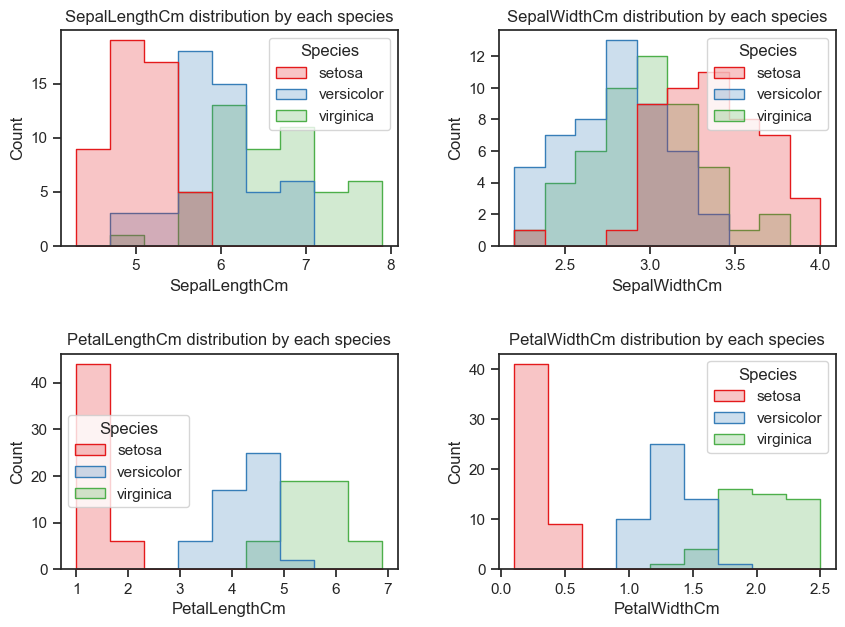

In [19]:
plt.figure(figsize=(10, 7))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=column, hue='Species', element="step", common_norm=False, palette="Set1")
    plt.title(f'{column} distribution by each species')
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

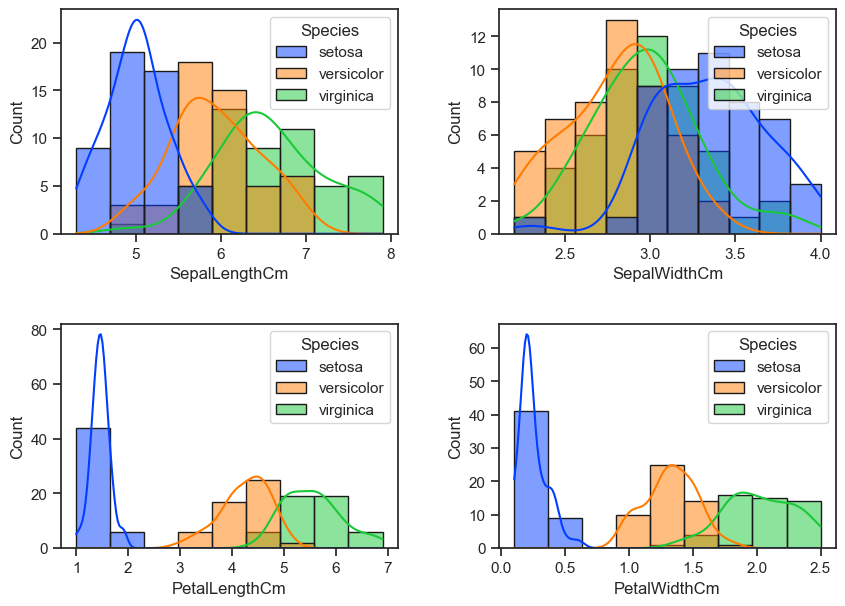

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='SepalLengthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[0,1],data=df,x ='SepalWidthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,0],data=df,x ='PetalLengthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,1],data=df,x ='PetalWidthCm',hue='Species',kde=True,palette="bright",edgecolor='k')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

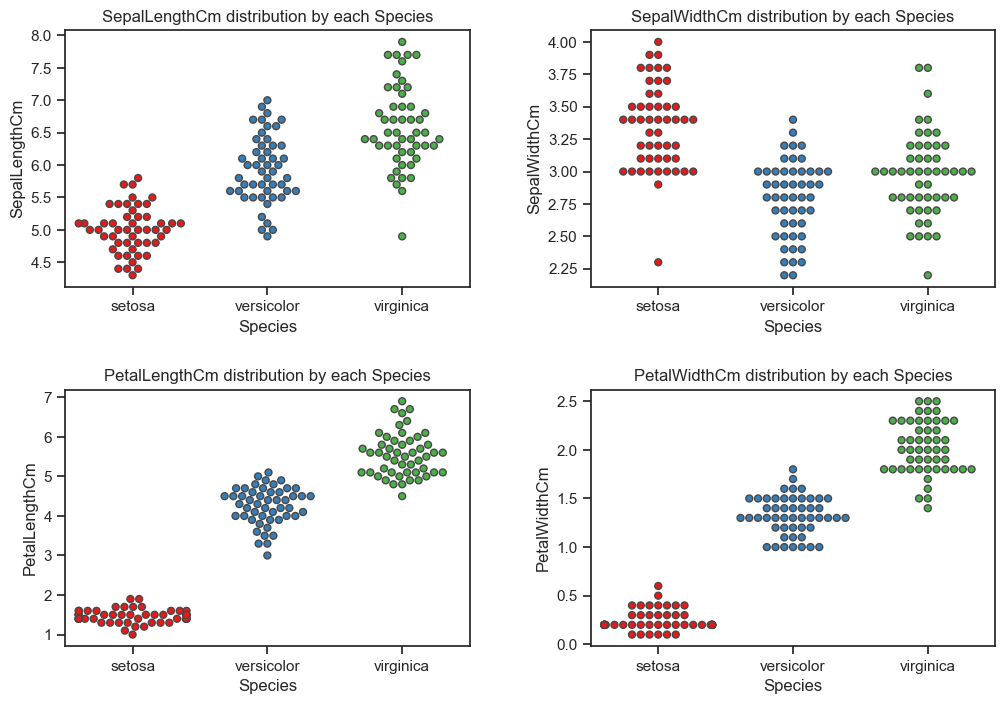

In [21]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='Species', y=column, data=df, linewidth=1, palette="Set1")
    plt.title(f'{column} distribution by each Species')
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

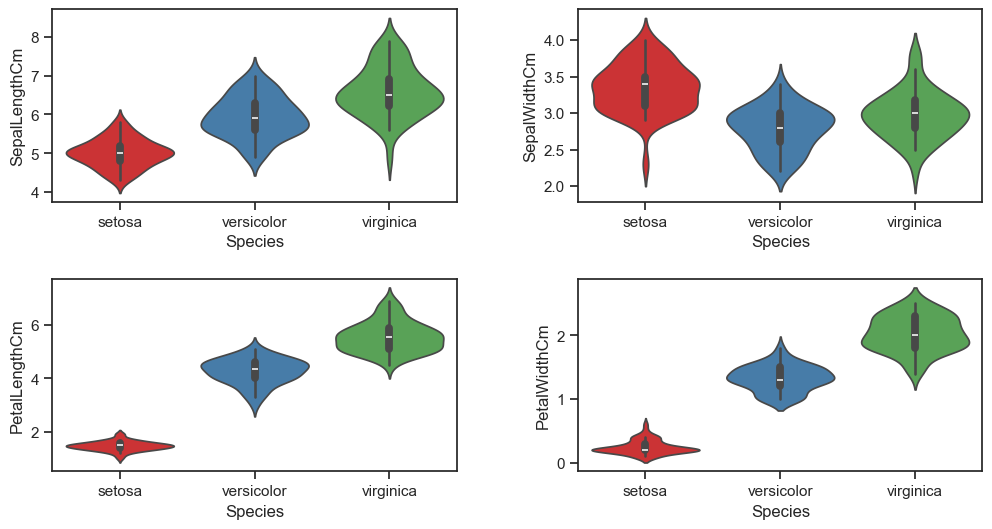

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="SepalLengthCm", data=df, palette="Set1")
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="SepalWidthCm", data=df, palette="Set1")
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="PetalLengthCm", data=df, palette="Set1")
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalWidthCm", data=df, palette="Set1")
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

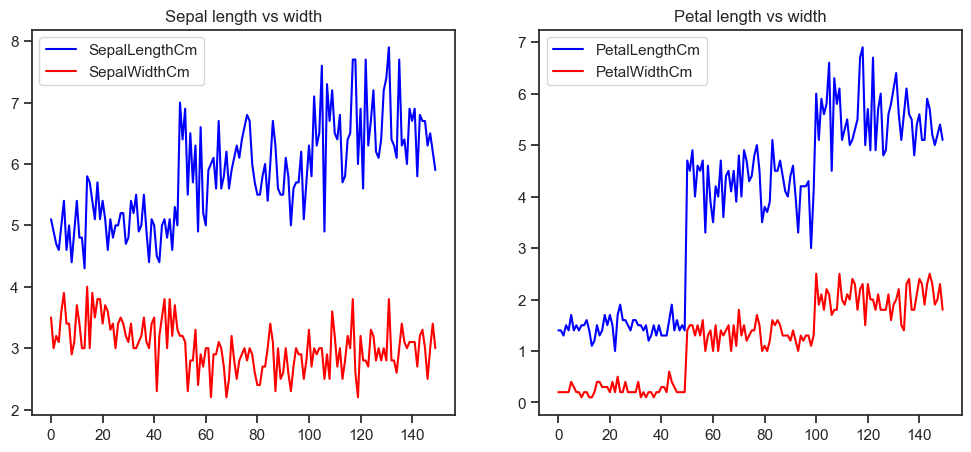

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['SepalLengthCm'],color='blue')
ax[0].plot(df['SepalWidthCm'],color='red')
ax[0].set_title('Sepal length vs width')
ax[0].legend(['SepalLengthCm','SepalWidthCm'])
ax[1].plot(df['PetalLengthCm'],color='blue')
ax[1].plot(df['PetalWidthCm'],color='red')
ax[1].set_title('Petal length vs width')
ax[1].legend(['PetalLengthCm','PetalWidthCm'])
plt.show()

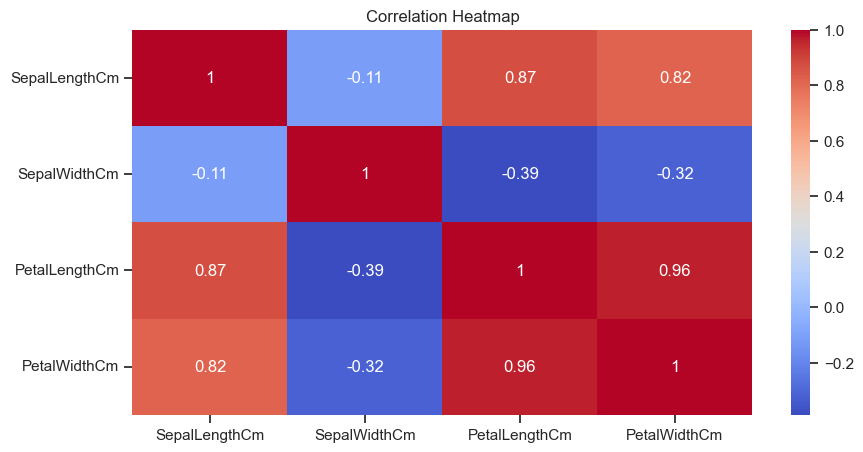

In [24]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm");
ax.set_title("Correlation Heatmap")
plt.show()

In [25]:
df["Species"]=df["Species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [26]:
X = df.drop(['Species'], axis=1)
y = df['Species']

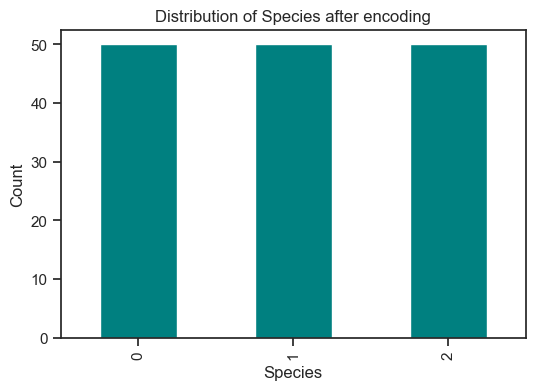

In [27]:
Species_encoded = y.value_counts()
plt.figure(figsize=(6, 4))
Species_encoded.plot(kind='bar', color='teal')
plt.title('Distribution of Species after encoding')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [32]:
def Evaluate_Performance(model, Xtrain, Xtest, ytrain, ytest) : 
    model.fit(Xtrain,ytrain)
    overall_score = cross_val_score(model, Xtrain,ytrain, cv=10)
    model_score = np.average(overall_score)
    ypredicted = model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(model.score(Xtrain, ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(ytest, ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(ytest, ypredicted , average=avg) * 100,2)}")

In [33]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train.ravel())
Logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression: ")
Evaluate_Performance(logistic_model, X_train, X_test, y_train, y_test)

Logistic Regression: 

 • Training Accuracy Score :  95.54
 • Cross Validation Score : 94.7
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(47.25, 0.5, 'Actual outputs')

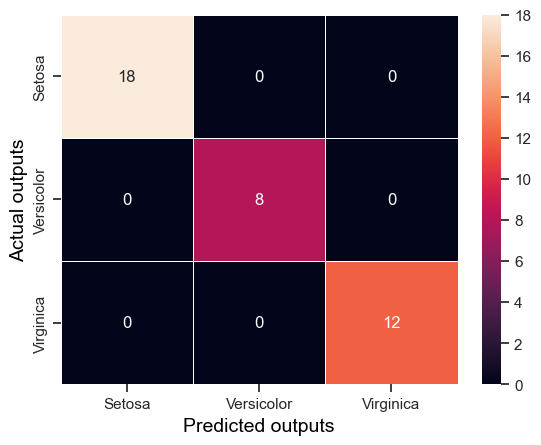

In [34]:
conf_matrix = confusion_matrix(y_test, Logistic_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

In [36]:
KNN = KNeighborsClassifier()
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 7}

In [37]:
K = 7
KNN_model = KNeighborsClassifier(K)
KNN_model.fit(X_train , y_train.ravel())
KNN_pred = KNN_model.predict(X_test)
print("K-Nearest Neighbors: ")
Evaluate_Performance(KNN_model, X_train, X_test, y_train, y_test)

K-Nearest Neighbors: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 94.7
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(47.25, 0.5, 'Actual outputs')

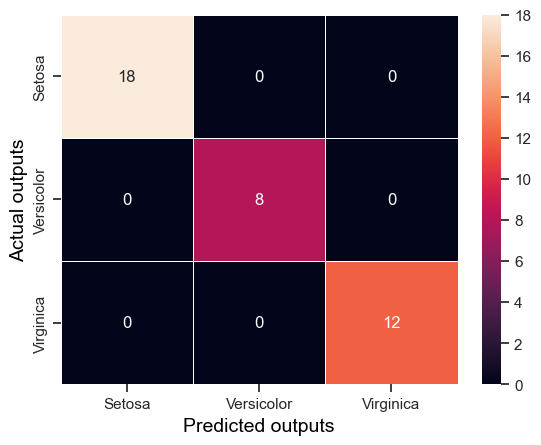

In [38]:
conf_matrix = confusion_matrix(y_test, KNN_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

In [39]:
GNB_model = GaussianNB()
GNB_model.fit(X_train , y_train.ravel())
GNB_pred = GNB_model.predict(X_test)
print("Gaussian Naive Bayes: ")
Evaluate_Performance(GNB_model, X_train, X_test, y_train, y_test)

Gaussian Naive Bayes: 

 • Training Accuracy Score :  94.64
 • Cross Validation Score : 94.62
 • Testing Accuracy Score :97.37
 • Precision Score is : 97.66
 • Recall Score is : 97.37
 • F1-Score Score is : 97.39


Text(47.25, 0.5, 'Actual outputs')

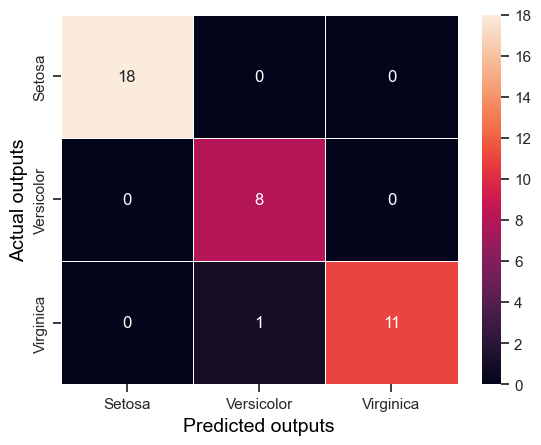

In [40]:
conf_matrix = confusion_matrix(y_test, GNB_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

In [41]:
SVM_model = SVC()
SVM_model.fit(X_train , y_train)
SVM_pred = SVM_model.predict(X_test)
print("Support Vector Machine: ")
Evaluate_Performance(SVM_model, X_train, X_test, y_train, y_test)

Support Vector Machine: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 93.79
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(47.25, 0.5, 'Actual outputs')

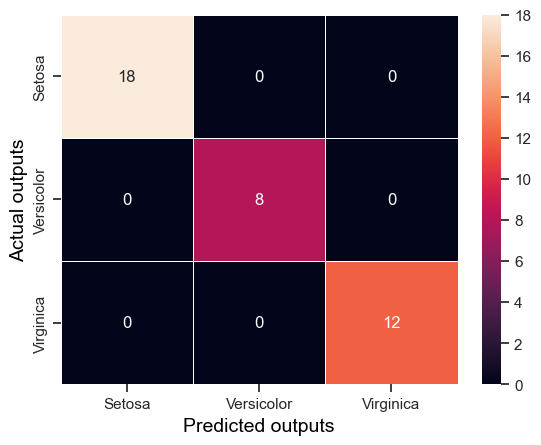

In [42]:
conf_matrix = confusion_matrix(y_test, SVM_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

In [43]:
DTree_model = DecisionTreeClassifier(max_depth = 3)
DTree_model.fit(X_train , y_train)
DTree_pred = DTree_model.predict(X_test)
print("Decision Tree: ")
Evaluate_Performance(DTree_model, X_train, X_test, y_train, y_test)

Decision Tree: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 92.05
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(47.25, 0.5, 'Actual outputs')

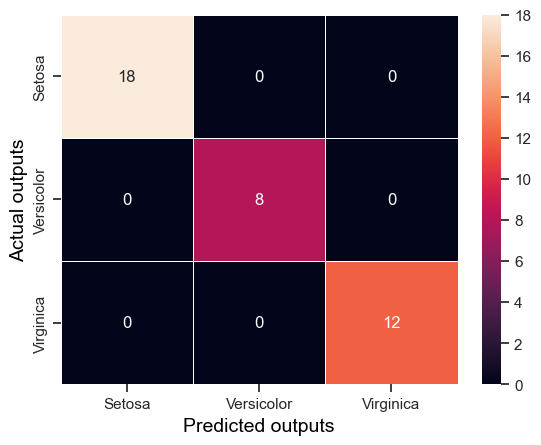

In [44]:
conf_matrix = confusion_matrix(y_test, DTree_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

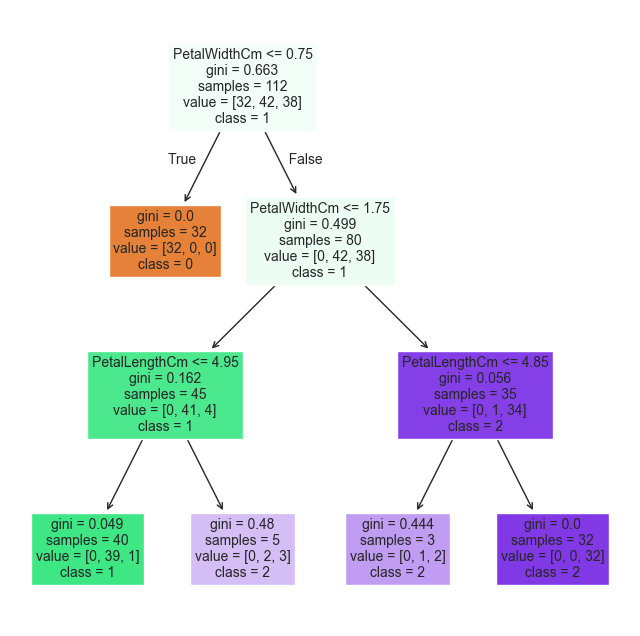

In [45]:
F = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (DTree_model , feature_names = F , class_names = T , filled = True)

In [46]:
RF_model = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF_model.fit(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print("Random Forest: ")
Evaluate_Performance(RF_model, X_train, X_test, y_train, y_test)

Random Forest: 

 • Training Accuracy Score :  94.64
 • Cross Validation Score : 93.79
 • Testing Accuracy Score :100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0


Text(47.25, 0.5, 'Actual outputs')

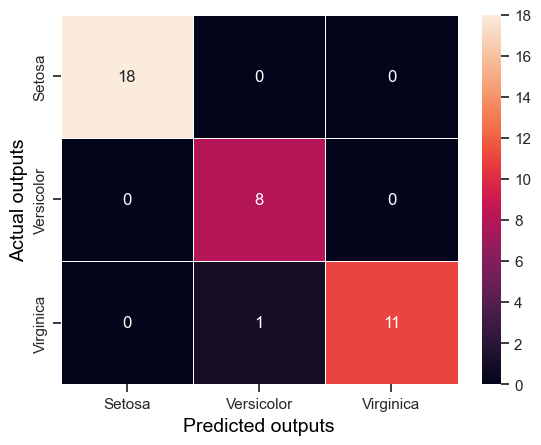

In [47]:
conf_matrix = confusion_matrix(y_test, RF_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

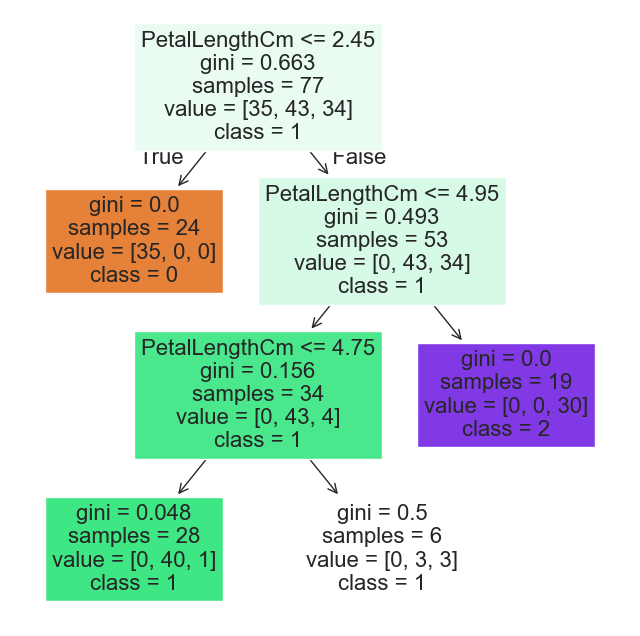

In [48]:
F = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (RF_model.estimators_[5] , feature_names = F , class_names = T , filled = True)

In [49]:
models = pd.DataFrame ({
    'Model' : ['Logistic Regression', ' K-Nearest Neighbors Model', 'Gaussian Naive Bayes', 'Support Vector Machine', 
               'Decision Tree', 'Random Forest'] ,
    'Precision' : [precision_score(y_test, Logistic_pred, average='weighted') , precision_score(y_test, KNN_pred, average='weighted'),
                   precision_score(y_test, GNB_pred, average='weighted') , precision_score(y_test, SVM_pred, average='weighted'), 
                   precision_score(y_test, DTree_pred, average='weighted') , precision_score(y_test, RF_pred, average='weighted')],
    'Recall' : [recall_score(y_test, Logistic_pred, average='weighted') , recall_score(y_test, KNN_pred, average='weighted'), 
                recall_score(y_test, GNB_pred, average='weighted') , recall_score(y_test, SVM_pred, average='weighted'),
                recall_score(y_test, DTree_pred, average='weighted') , recall_score(y_test, RF_pred, average='weighted')],
    'F1-score' : [f1_score(y_test, Logistic_pred, average='weighted') , f1_score(y_test, KNN_pred, average='weighted'),
                  f1_score(y_test, GNB_pred, average='weighted') , f1_score(y_test, SVM_pred, average='weighted'), 
                  f1_score(y_test, DTree_pred, average='weighted') , f1_score(y_test, RF_pred, average='weighted')],
    'Accuracy' : [accuracy_score(y_test, Logistic_pred) , accuracy_score(y_test, KNN_pred) , accuracy_score(y_test, GNB_pred),
                  accuracy_score(y_test, SVM_pred) , accuracy_score(y_test, DTree_pred) , accuracy_score(y_test, RF_pred)]})

models = models.sort_values(by='Accuracy', ascending=False)    
print(tabulate(models, headers='keys', tablefmt='github',showindex=False))

| Model                     |   Precision |   Recall |   F1-score |   Accuracy |
|---------------------------|-------------|----------|------------|------------|
| Logistic Regression       |    1        | 1        |   1        |   1        |
| K-Nearest Neighbors Model |    1        | 1        |   1        |   1        |
| Support Vector Machine    |    1        | 1        |   1        |   1        |
| Decision Tree             |    1        | 1        |   1        |   1        |
| Gaussian Naive Bayes      |    0.976608 | 0.973684 |   0.973886 |   0.973684 |
| Random Forest             |    0.976608 | 0.973684 |   0.973886 |   0.973684 |


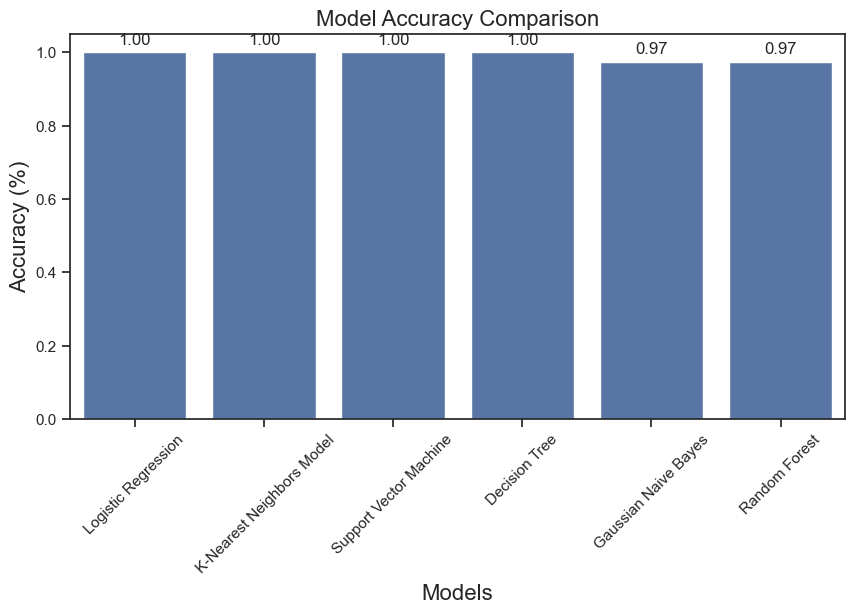

In [50]:
plt.figure(figsize=(10, 5))
plot=sns.barplot(x='Model',y='Accuracy',data=models)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Model Accuracy Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy (%)",fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [51]:
X.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [52]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

In [53]:
user_values=np.array([6.7,3.0,5.2,2.3]).reshape(1,-1)
feature_names = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
user_values_df = pd.DataFrame(user_values, columns=feature_names)

predict = KNN_model.predict(user_values_df)

print(f'The species is: {predict}')

The species is: [2]


In [54]:
df["Species"]=df["Species"].replace({0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
pred_result = pd.DataFrame(KNN_model.predict(X))
pred_result = pred_result.rename(columns = {0 : "Predicted Species"})
pred_result

,Predicted Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [56]:
Species_decoded = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
pred_result['predicted_species'] = pred_result['Predicted Species'].map(Species_decoded)
pred_result

,Predicted Species,predicted_species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [57]:
final_model = pd.concat([df, pred_result['predicted_species']], axis = 1)
final_model

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted_species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [58]:
final_model.to_csv(r"C:\Users\Darshit\OneDrive\Desktop\OIBSIP\Task 1\IRIS_Flower_Classified.csv")